In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None,na_values='?')

In [3]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None,na_values='?')

In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [5]:
train_set.columns = col_labels
test_set.columns = col_labels

In [6]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
cat_features = []
for i in train_set:
    if (train_set[i].dtypes == 'object'):
        cat_features.append(i)

cat_features
        

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class']

In [10]:
#pd.get_dummies(data=train_set,columns=cat_features,drop_first=True)

In [11]:
data_desc = train_set.describe()

In [12]:

data_desc

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [14]:
train_set.size

488415

In [15]:
train_set.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [16]:
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [17]:
train_set.wage_class.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: wage_class, dtype: object

In [18]:
train_set.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [19]:
train_set.wage_class.value_counts()

 <=50K    24720
 >50K      7841
Name: wage_class, dtype: int64

In [20]:

train_set = train_set.dropna()

In [21]:
numerical_col = train_set.select_dtypes(include= ['int64','float64']).columns


In [22]:
numerical_col

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [23]:
train_set_numerical = train_set[numerical_col]

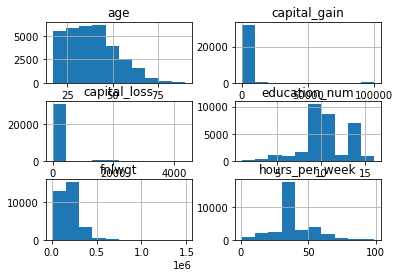

In [24]:
train_set_numerical.hist()
plt.show()

In [25]:
le = LabelEncoder()

In [26]:
test_set_new = test_set[cat_features].apply(le.fit_transform)

In [27]:
train_set_new= train_set[cat_features].apply(le.fit_transform)

In [29]:
train_set.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
train_set_new.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


In [43]:
df_train = train_set.drop(columns=cat_features,axis =1)
df_test  = test_set.drop(columns=cat_features,axis =1)

In [44]:
df_train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [45]:
df_train_new = pd.concat([df_train,train_set_new],axis=1)
df_test_new = pd.concat([df_test,test_set_new],axis=1)

In [46]:
df_train_new.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,39,77516,13,2174,0,40,7,9,4,1,1,4,1,39,0
1,50,83311,13,0,0,13,6,9,2,4,0,4,1,39,0
2,38,215646,9,0,0,40,4,11,0,6,1,4,1,39,0
3,53,234721,7,0,0,40,4,1,2,6,0,2,1,39,0
4,28,338409,13,0,0,40,4,9,2,10,5,2,0,5,0


In [47]:
df_test_new.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,25,226802,7,0,0,40,4,1,4,7,3,2,1,38,0
1,38,89814,9,0,0,50,4,11,2,5,0,4,1,38,0
2,28,336951,12,0,0,40,2,7,2,11,0,4,1,38,1
3,44,160323,10,7688,0,40,4,15,2,7,0,2,1,38,1
4,18,103497,10,0,0,30,0,15,4,0,3,4,0,38,0


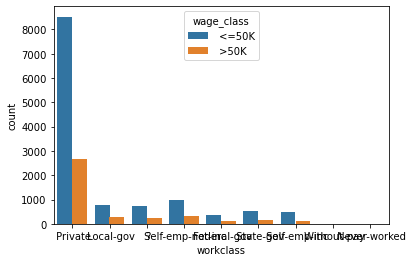

<Figure size 3600x1440 with 0 Axes>

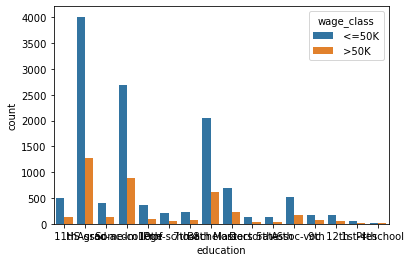

<Figure size 3600x1440 with 0 Axes>

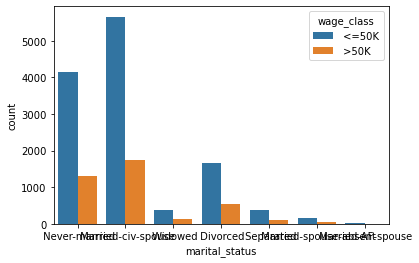

<Figure size 3600x1440 with 0 Axes>

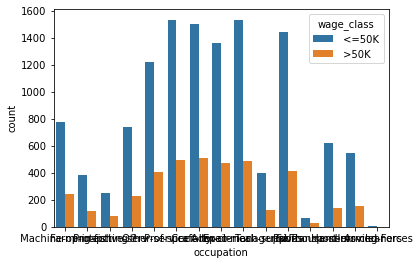

<Figure size 3600x1440 with 0 Axes>

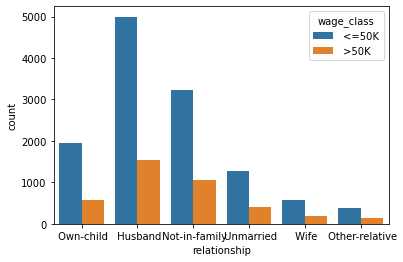

<Figure size 3600x1440 with 0 Axes>

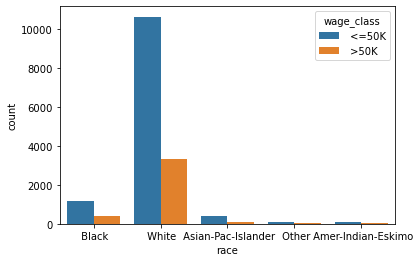

<Figure size 3600x1440 with 0 Axes>

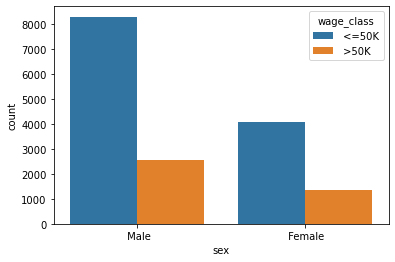

<Figure size 3600x1440 with 0 Axes>

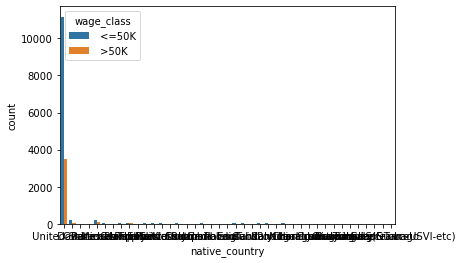

<Figure size 3600x1440 with 0 Axes>

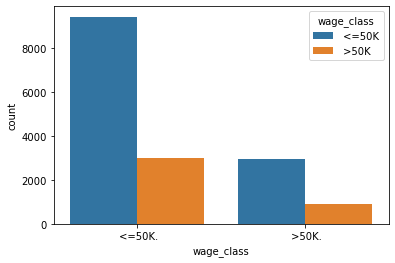

<Figure size 3600x1440 with 0 Axes>

In [48]:
for i in cat_features:
    sns.countplot(test_set[i],hue=train_set.wage_class)
    plt.figure(figsize=(50,20))
    plt.show()

In [50]:
vif = pd.DataFrame()
vif["variables"] = df_train_new.columns
vif["VIF"] = [variance_inflation_factor(df_train_new.values, i) for i in range(df_train_new.shape[1])]

In [51]:
vif

,variables,VIF
0,age,8.612915
1,fnlwgt,4.033151
2,education_num,19.641550
3,capital_gain,1.083818
4,capital_loss,1.078968
5,hours_per_week,12.202241
6,workclass,8.492594
7,education,9.239470
8,marital_status,4.071643
9,occupation,3.711141


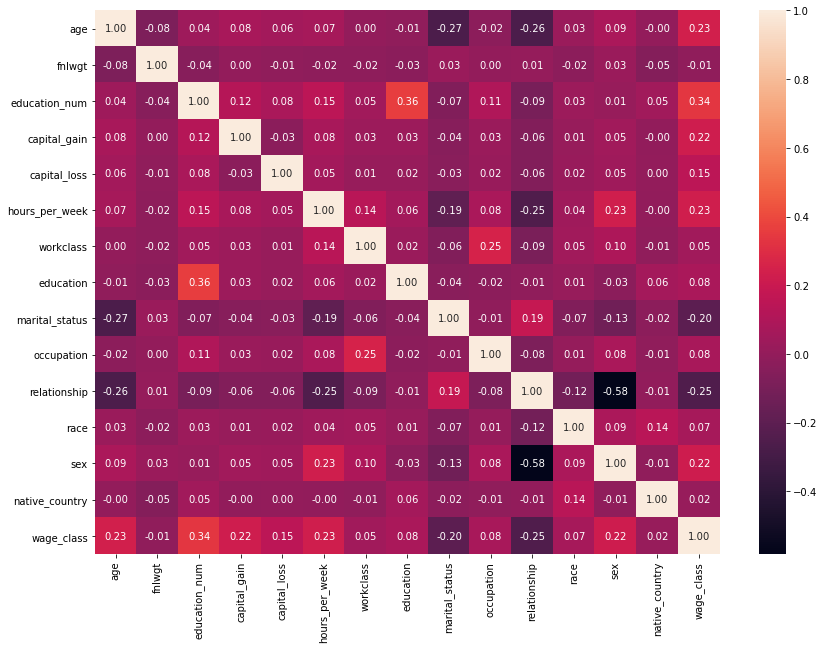

In [59]:
plt.figure(figsize=(14,10))
sns.heatmap(df_train_new.corr(),annot=True,fmt='.2f')
plt.show()

In [60]:
x_train = df_train_new.drop(columns=['wage_class'],axis =1)
y_train= df_train_new['wage_class']

In [61]:
xtest = df_test_new.drop(columns=['wage_class'],axis =1)
ytest = df_test_new['wage_class']

In [62]:
print(x_train.shape)
print(y_train.shape)
print(xtest.shape)
print(ytest.shape)
print(type(xtest))


(32561, 14)
(32561,)
(16281, 14)
(16281,)
<class 'pandas.core.frame.DataFrame'>


In [63]:
x_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education_num   32561 non-null  int64
 3   capital_gain    32561 non-null  int64
 4   capital_loss    32561 non-null  int64
 5   hours_per_week  32561 non-null  int64
 6   workclass       32561 non-null  int32
 7   education       32561 non-null  int32
 8   marital_status  32561 non-null  int32
 9   occupation      32561 non-null  int32
 10  relationship    32561 non-null  int32
 11  race            32561 non-null  int32
 12  sex             32561 non-null  int32
 13  native_country  32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 4.0 MB


In [64]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [65]:
# cheking training accuracy
y_pred1= model.predict(x_train)
accuracy = accuracy_score(y_train,y_pred1)
accuracy

0.9043334049937041

In [66]:
# cheking initial test accuracy
y_pred2 = model.predict(xtest)
accuracy = accuracy_score(ytest,y_pred2)
accuracy

0.8695411829740188

In [ ]:
# Now to increae the accuracy of the model, we'll do hyperparameter tuning using grid search
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [ ]:
#grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [ ]:
#grid.fit(x_train,y_train)

In [ ]:
#grid.best_params_

In [67]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 50)
new_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [68]:
# cheking new test accuracy
y_pred_new = new_model.predict(xtest)
predictions = [round(value) for value in y_pred_new]
accuracy = accuracy_score(ytest,predictions)
accuracy

0.8592838277747067

In [69]:
# lets save the old model

filename = 'xgboost_model.pickle'
pickle.dump(model, open(filename, 'wb'))


In [70]:
 
loaded_model = pickle.load(open(filename, 'rb'))

In [75]:
loaded_model.predict(xtest[0:10])

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [76]:
ytest.loc[0:10]

0     0
1     0
2     1
3     1
4     0
5     0
6     0
7     1
8     0
9     0
10    1
Name: wage_class, dtype: int32